In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [4]:
house_price=pd.read_csv('/content/boston.csv')

In [7]:
house_price.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [9]:
house_price.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
print(house_price)

        CRIM    ZN  INDUS  CHAS    NOX     RM  ...  RAD    TAX  PTRATIO       B  LSTAT  MEDV
0    0.00632  18.0   2.31     0  0.538  6.575  ...    1  296.0     15.3  396.90   4.98  24.0
1    0.02731   0.0   7.07     0  0.469  6.421  ...    2  242.0     17.8  396.90   9.14  21.6
2    0.02729   0.0   7.07     0  0.469  7.185  ...    2  242.0     17.8  392.83   4.03  34.7
3    0.03237   0.0   2.18     0  0.458  6.998  ...    3  222.0     18.7  394.63   2.94  33.4
4    0.06905   0.0   2.18     0  0.458  7.147  ...    3  222.0     18.7  396.90   5.33  36.2
..       ...   ...    ...   ...    ...    ...  ...  ...    ...      ...     ...    ...   ...
501  0.06263   0.0  11.93     0  0.573  6.593  ...    1  273.0     21.0  391.99   9.67  22.4
502  0.04527   0.0  11.93     0  0.573  6.120  ...    1  273.0     21.0  396.90   9.08  20.6
503  0.06076   0.0  11.93     0  0.573  6.976  ...    1  273.0     21.0  396.90   5.64  23.9
504  0.10959   0.0  11.93     0  0.573  6.794  ...    1  273.0     21.

In [18]:
# Assuming the target variable is in a column named 'MEDV' (common in Boston housing dataset)
house_price['price'] = house_price['MEDV']
house_price.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,36.2


In [20]:
house_price.shape
house_price.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


#correlation data


In [21]:
correlation=house_price.corr()

<Axes: >

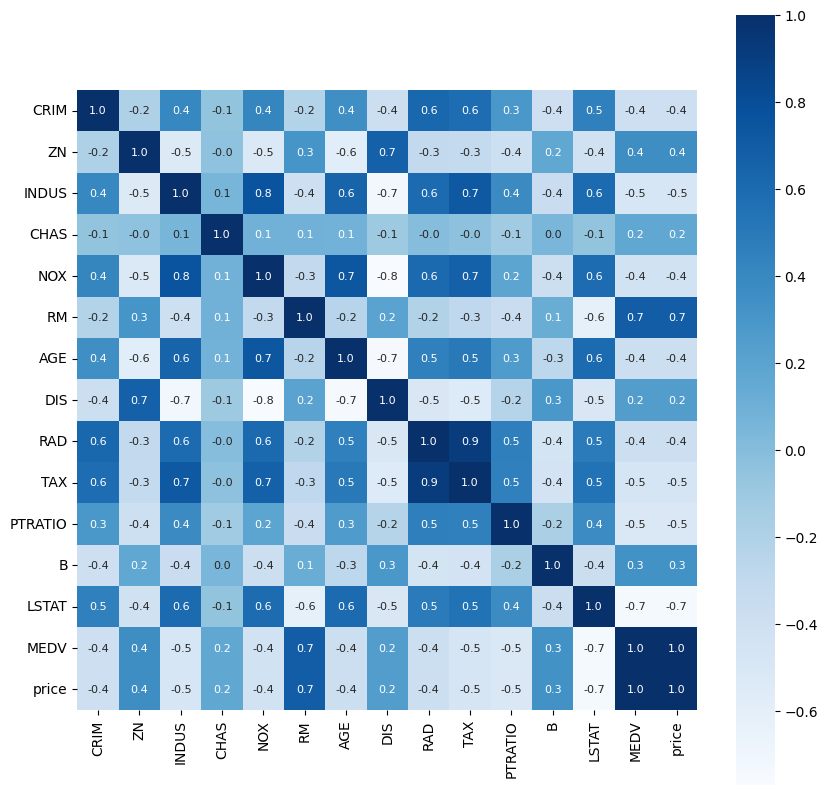

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [36]:
x=house_price.drop(['price'],axis=1)
y=house_price['price']
print(x)
print(y)

        CRIM    ZN  INDUS  CHAS    NOX     RM  ...  RAD    TAX  PTRATIO       B  LSTAT  MEDV
0    0.00632  18.0   2.31     0  0.538  6.575  ...    1  296.0     15.3  396.90   4.98  24.0
1    0.02731   0.0   7.07     0  0.469  6.421  ...    2  242.0     17.8  396.90   9.14  21.6
2    0.02729   0.0   7.07     0  0.469  7.185  ...    2  242.0     17.8  392.83   4.03  34.7
3    0.03237   0.0   2.18     0  0.458  6.998  ...    3  222.0     18.7  394.63   2.94  33.4
4    0.06905   0.0   2.18     0  0.458  7.147  ...    3  222.0     18.7  396.90   5.33  36.2
..       ...   ...    ...   ...    ...    ...  ...  ...    ...      ...     ...    ...   ...
501  0.06263   0.0  11.93     0  0.573  6.593  ...    1  273.0     21.0  391.99   9.67  22.4
502  0.04527   0.0  11.93     0  0.573  6.120  ...    1  273.0     21.0  396.90   9.08  20.6
503  0.06076   0.0  11.93     0  0.573  6.976  ...    1  273.0     21.0  396.90   5.64  23.9
504  0.10959   0.0  11.93     0  0.573  6.794  ...    1  273.0     21.

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x.shape,x_train.shape,x_test.shape)

(506, 14) (404, 14) (102, 14)


#model training

In [42]:
model=XGBRegressor()


In [43]:
model.fit(x_train , y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [50]:
model_prediction=model.predict(x_train)


In [51]:
print(model_prediction)

[23.096664  21.001574  20.10024   34.700684  13.901037  13.499045
 22.000622  15.199905  10.900547  22.699903  13.801873   5.599842
 29.799076  49.999523  34.900215  20.599218  23.399805  19.202486
 32.699593  19.599394  27.000483   8.399958  46.000423  21.701403
 27.09962   19.398766  19.299393  24.799637  22.599468  31.698784
 18.500198   8.700114  17.401375  23.6992    13.299949  10.500512
 12.702455  24.999817  19.699732  14.90422   24.201471  25.00018
 14.90066   17.00027   15.601099  12.700122  24.500992  15.000621
 50.000015  17.4974    21.200356  32.00045   15.600184  22.899029
 19.29887   18.700079  23.299124  37.20052   30.09995   33.099564
 21.000408  49.99996   13.399346   5.0011516 16.499998   8.400362
 28.698318  19.499744  20.597996  45.39892   39.800728  33.400215
 19.8001    33.399807  25.300093  49.99986   12.498708  17.399752
 18.600016  22.599289  50.000793  23.802216  23.298512  23.0993
 41.698616  16.099976  31.599598  36.098694   6.9997935 20.402048
 20.00053   1

r error
mean value eror

In [52]:
score_1=metrics.r2_score(y_train,model_prediction)
score_2=metrics.mean_absolute_error(y_train,model_prediction)
print("R squared error:",score_1)
print("Mean absolute error:",score_2)

R squared error: 0.9999999863800354
Mean absolute error: 0.0007966853604459063


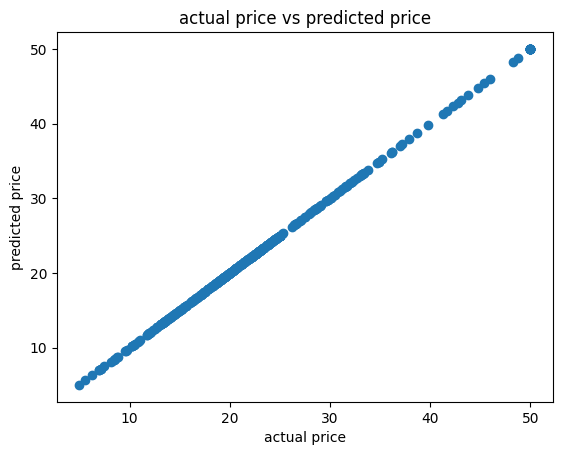

In [55]:
plt.scatter(y_train,model_prediction)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual price vs predicted price")
plt.show()

In [53]:
model_predicte=model.predict(x_test)

In [54]:
score_1=metrics.r2_score(y_test,model_predicte)
score_2=metrics.mean_absolute_error(y_test,model_predicte)
print("R squared error:",score_1)
print("Mean absolute error:",score_2)

R squared error: 0.9994094144429205
Mean absolute error: 0.13132437350703222


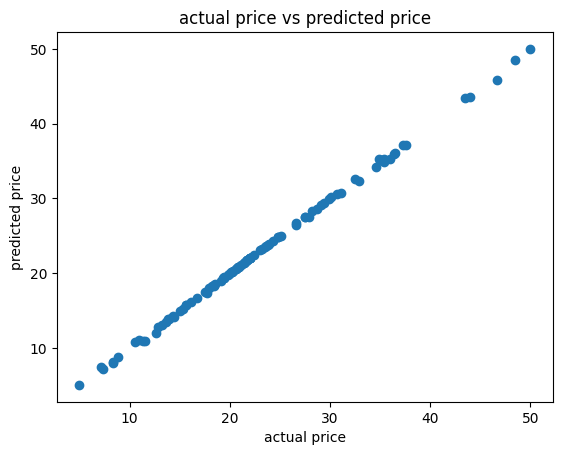

In [56]:
plt.scatter(y_test,model_predicte)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual price vs predicted price")
plt.show()